<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_classification_DecisionTree_GenderType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base = pd.read_csv('/content/MBA_ADMISSIONS.csv')

In [4]:
base.head()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance


In [51]:
base. tail()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization,Target
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,Central Zone,Engineering,Single,Urban,prefered skills,Marketing,1
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS,1
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Central Zone,Engineering,Single,Urban,desired skills,Finance,0
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance,1
472,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Central Zone,Engineering,Single,Urban,prefered skills,Finance,0


In [11]:
#VISUALIZAO DE DADOS
np.unique(base['Gender'], return_counts = True)

(array(['Female', 'Male'], dtype=object), array([205, 268]))

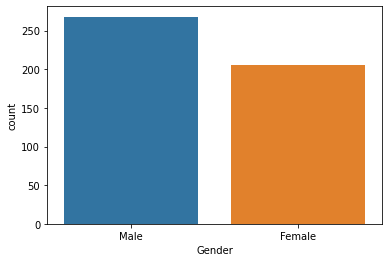

In [10]:
sns.countplot( x = base['Gender']);

In [12]:
base.isnull().sum()

pre_score                       0
Age_in_years                    0
Percentage_in_10_Class          0
Percentage_in_12_Class          0
Percentage_in_Under_Graduate    0
percentage_MBA                  0
post_score                      0
Gender                          0
STATE                           0
Previous_Degree                 0
Marital_status                  0
Place_you_belong_to             0
perceived#Job#Skill             0
Specialization                  0
dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder

In [68]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(base['STATE'])
base['estado'] = labels

In [69]:
label_encode = LabelEncoder()
labels1 = label_encode.fit_transform(base['Previous_Degree'])
base['grau anterior'] = labels1

In [70]:
label_encode = LabelEncoder()
labels2 = label_encode.fit_transform(base['Marital_status'])
base['estado civel'] = labels2

In [71]:
label_encode = LabelEncoder()
labels3 = label_encode.fit_transform(base['Place_you_belong_to'])
base['lugar que pertence'] =labels3

In [72]:
label_encode = LabelEncoder()
labels4 = label_encode.fit_transform(base['perceived#Job#Skill'])
base['skills'] = labels4

In [73]:
label_encode = LabelEncoder()
labels5 = label_encode.fit_transform(base['Specialization'])
base['especialização'] = labels5

In [75]:
base.head()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization,Target,estado,grau anterior,estado civel,lugar que pertence,skills,especialização
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,1,Engineering,Single,Urban,prefered skills,Marketing,1,1,2,1,2,1,3
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,1,Engineering,Single,Semi Urban,prefered skills,LOS,1,1,2,1,1,1,2
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,1,Engineering,Single,Urban,desired skills,Finance,0,1,2,1,2,0,0
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,1,Commerce,Single,Semi Urban,prefered skills,Finance,1,1,1,1,1,1,0
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,1,Engineering,Single,Urban,prefered skills,Finance,0,1,2,1,2,1,0


In [76]:
base.drop(columns=['Previous_Degree','Marital_status', 'Place_you_belong_to','perceived#Job#Skill','Specialization'], axis=1, inplace=True)

In [81]:
base.head()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,STATE,Target,estado,grau anterior,estado civel,lugar que pertence,skills,especialização,alvo
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,1,1,1,2,1,2,1,3,1
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,1,1,1,2,1,1,1,2,1
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,1,0,1,2,1,2,0,0,0
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,1,1,1,1,1,1,1,0,1
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,1,0,1,2,1,2,1,0,0


In [83]:
base.drop(columns=['Target'], axis=1, inplace=True)

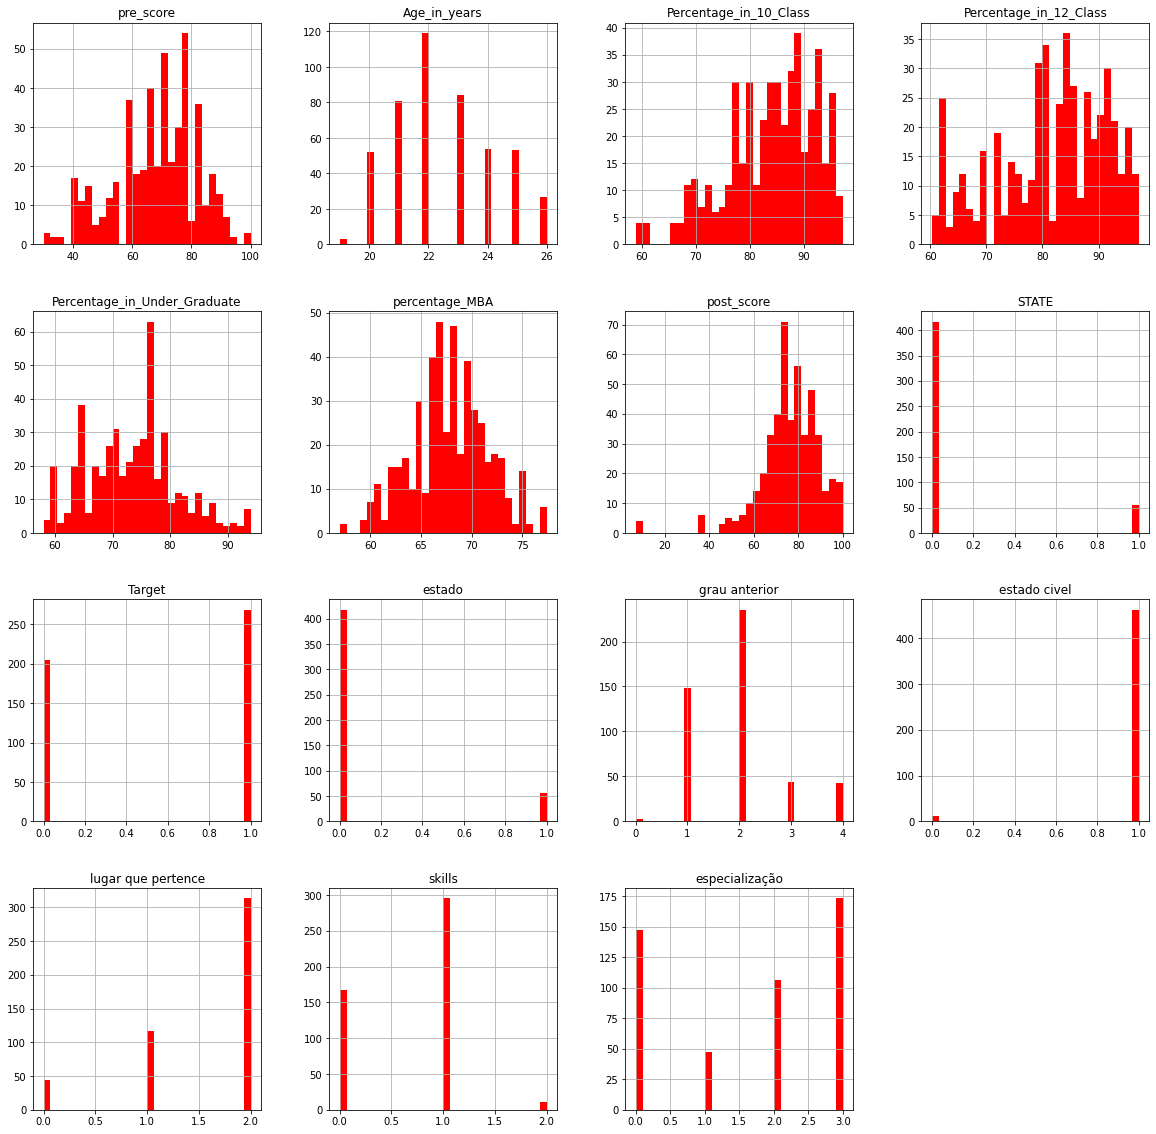

In [78]:
base.hist(bins=30, figsize=(20,20), color = 'r');

In [80]:
base['alvo'] = base['Target']

In [84]:
base.head()

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,STATE,estado,grau anterior,estado civel,lugar que pertence,skills,especialização,alvo
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,1,1,2,1,2,1,3,1
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,1,1,2,1,1,1,2,1
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,1,1,2,1,2,0,0,0
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,1,1,1,1,1,1,0,1
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,1,1,2,1,2,1,0,0


In [85]:
x_base = base.iloc[:,0:14].values
y_base = base.iloc[:,14].values

In [86]:
x_base.shape 

(473, 14)

In [87]:
y_base.shape

(473,)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_base, y_base, test_size=0.30, random_state=0)

In [90]:
x_treino.shape

(331, 14)

In [91]:
y_treino.shape

(331,)

In [92]:
x_teste.shape

(142, 14)

In [93]:
y_teste.shape

(142,)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler_base = StandardScaler()
x_base = scaler_base.fit_transform(x_base)

In [95]:
from sklearn.ensemble import ExtraTreesClassifier

In [96]:
decision_tree = ExtraTreesClassifier(n_estimators=50, criterion='entropy')

In [97]:
decision_tree.fit(x_treino, y_treino)

ExtraTreesClassifier(criterion='entropy', n_estimators=50)

In [98]:
previsao = decision_tree.predict(x_teste)

In [99]:
previsao

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [100]:
y_teste

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [106]:
from sklearn.metrics import accuracy_score, classification_report

In [102]:
accuracy_score(y_teste,previsao)

0.971830985915493

excelente

In [103]:
from yellowbrick.classifier import ConfusionMatrix

In [104]:
cm = ConfusionMatrix(decision_tree)

0.971830985915493

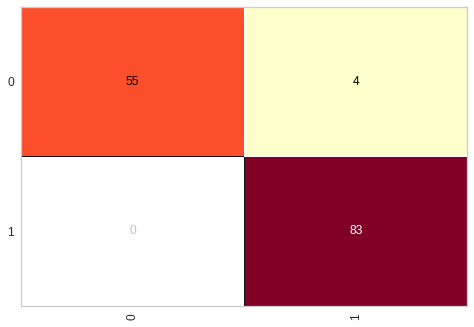

In [105]:
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [107]:
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.95      1.00      0.98        83

    accuracy                           0.97       142
   macro avg       0.98      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



perfeito!!!

Foram feitos muitos passos a mais do que precisava, e a ordem ficou um pouco bagunçada, mas esta ai, usando o algoritimo de ARVore de decisão obtivemos uma excelente acurácia em prever quantos dos aprovados eram homens e mulheres